In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def exp(x, y):
    return x ** y

def hyp(x, y):
    return np.hypot(x, y)

def e(x, y):
    return np.exp(x)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div],
    operation_names = ["+", "-", "*", "/"],
    popsize = 80, 
    maxiter = 60, 
    mutation_rate = 0.05
    max_tree_depth = 7
)

In [4]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target

In [5]:
tester = tester(X, y, generator, 8, 2, 1000, verbose = True, test_size = 0.2, random_state = 42)

Split:  0 Feature:  0
Iteration:  59 Best fitness:  0.41384987893462466 Generation best 0.38246973365617435
Split:  1 Feature:  1
Iteration:  59 Best fitness:  0.33907990314769976 Generation best 0.33907990314769976
Split:  0 Feature:  2
Iteration:  59 Best fitness:  0.3145762711864407 Generation best 0.29966101694915264
Split:  1 Feature:  3
Iteration:  59 Best fitness:  0.30663438256658593 Generation best 0.27225181598062953
Split:  0 Feature:  4
Iteration:  59 Best fitness:  0.30847457627118646 Generation best 0.30847457627118646
Split:  1 Feature:  5
Iteration:  59 Best fitness:  0.3671670702179177 Generation best 0.361549636803874174
Split:  0 Feature:  6
Iteration:  59 Best fitness:  0.3941888619854722 Generation best 0.37937046004842615
Split:  1 Feature:  7
Iteration:  59 Best fitness:  0.38498789346246975 Generation best 0.32823244552058106


In [6]:
tester.test_models(notests=50)

In [7]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,2945.302579,0.444089,44.153257,2735.151879,0.483754,41.503285
1,MLPRegressor,4533.957576,0.144238,52.042832,4189.278859,0.209294,50.109949
2,GradientBoostingRegressor,3702.534557,0.301165,49.002566,3273.117245,0.382215,46.639128


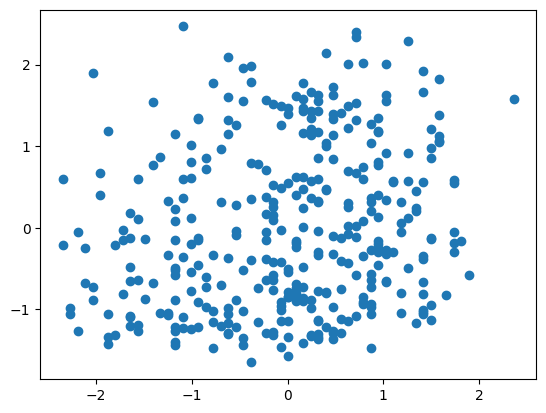

Min:  -2.3486324538364367 Max:  2.3619769564150532 Mean:  1.5096517048727343e-17 Std:  1.0000000000000009


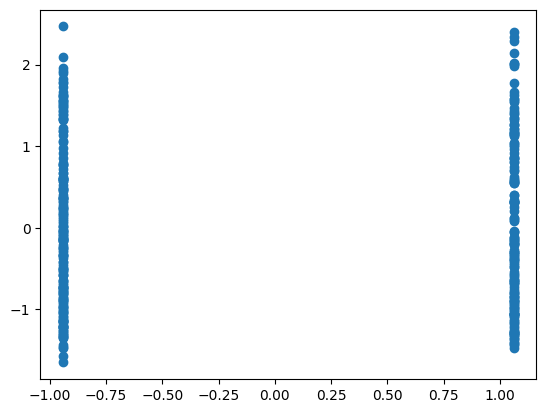

Min:  -0.9421786108585579 Max:  1.0613698809069299 Mean:  6.290215436969726e-17 Std:  1.0000000000000022


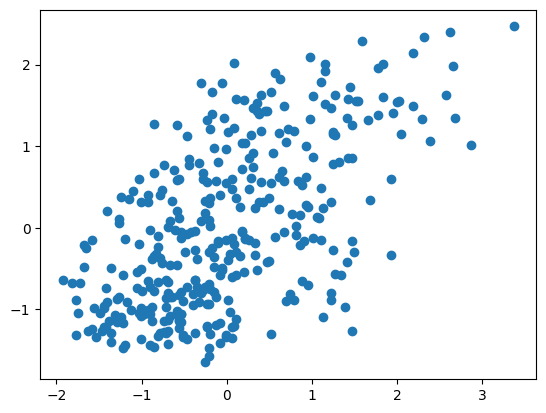

Min:  -1.9262122659964824 Max:  3.3705804187140114 Mean:  -6.290215436969726e-17 Std:  1.0


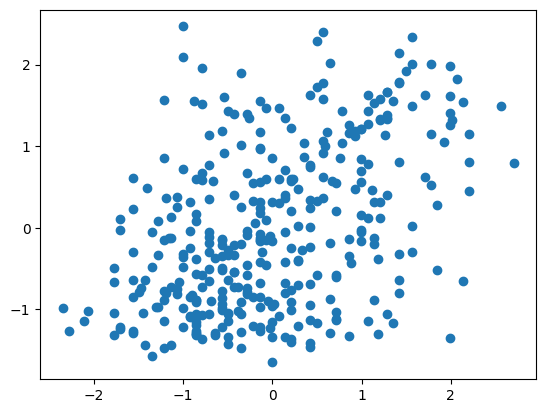

Min:  -2.3466560493895967 Max:  2.7038054721359144 Mean:  1.5096517048727343e-17 Std:  1.0


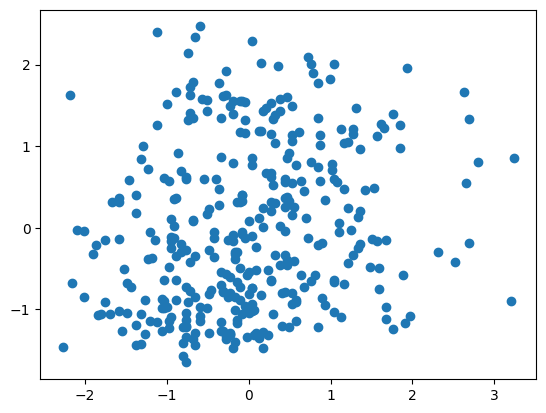

Min:  -2.270371764140696 Max:  3.2371217759635766 Mean:  -3.7741292621818353e-17 Std:  1.0000000000000002


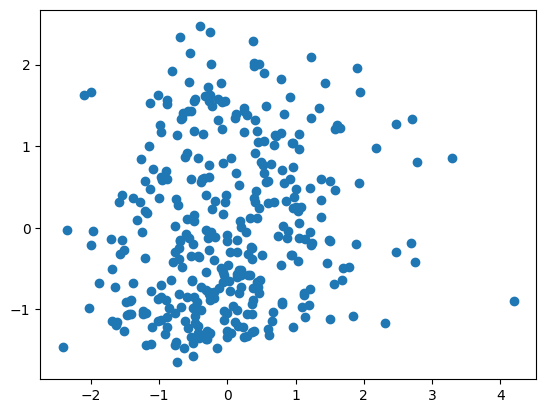

Min:  -2.413754204699228 Max:  4.196352273913501 Mean:  -2.5160861747878903e-18 Std:  1.0000000000000002


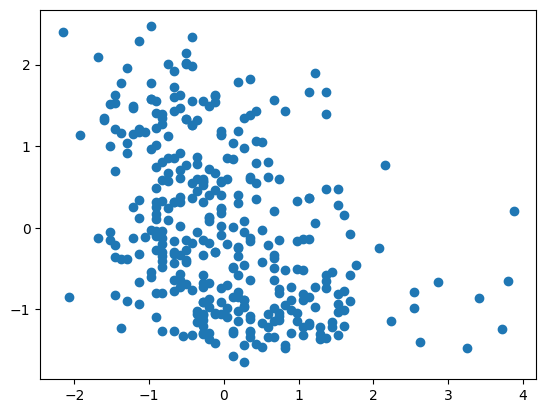

Min:  -2.1567593564585774 Max:  3.877815358441891 Mean:  5.0321723495757804e-17 Std:  1.0000000000000002


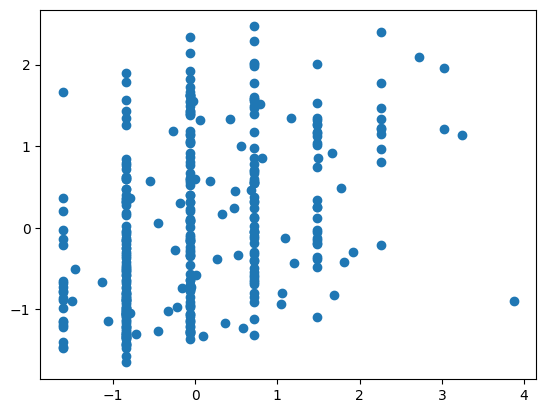

Min:  -1.6087064461483136 Max:  3.873622301436947 Mean:  2.7173730687709215e-16 Std:  1.0000000000000016


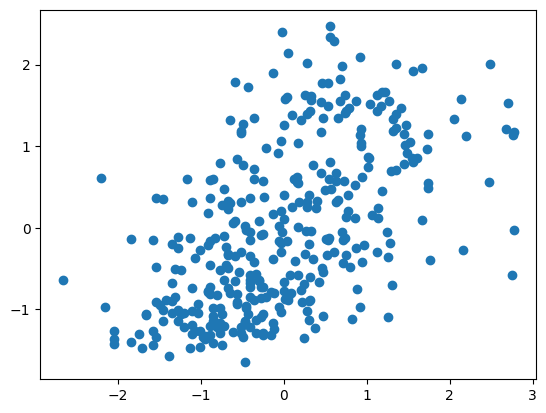

Min:  -2.6656607467111533 Max:  2.7717745232066493 Mean:  4.0257378796606245e-17 Std:  1.0000000000000007


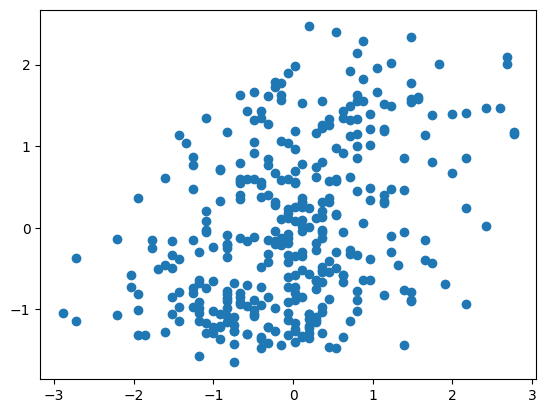

Min:  -2.890772785226981 Max:  2.7678748664465362 Mean:  -4.528955114618202e-17 Std:  0.9999999999999997


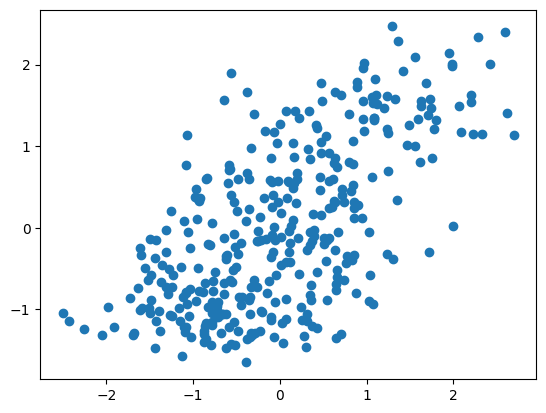

Min:  -2.503745202970848 Max:  2.6948055899940924 Mean:  1.9122254928387965e-16 Std:  1.0


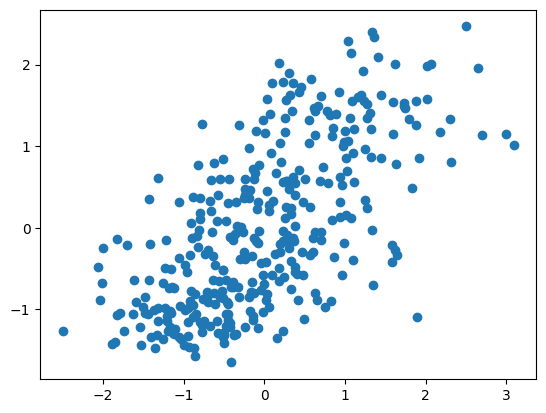

Min:  -2.4967078434811856 Max:  3.092165440689107 Mean:  5.535389584533358e-17 Std:  0.9999999999999999


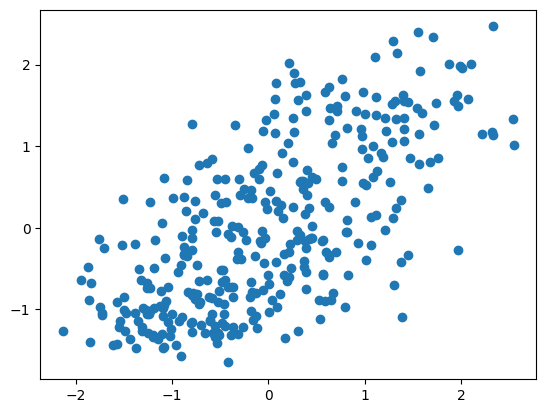

Min:  -2.1371138074673564 Max:  2.548042786503812 Mean:  3.0193034097454685e-17 Std:  0.9999999999999998


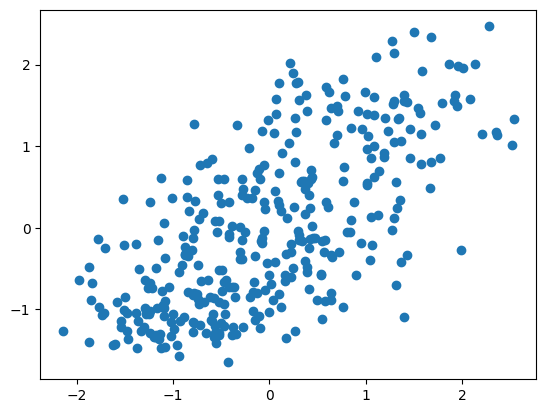

Min:  -2.1452348576185667 Max:  2.53741012808411 Mean:  4.0257378796606245e-17 Std:  1.0


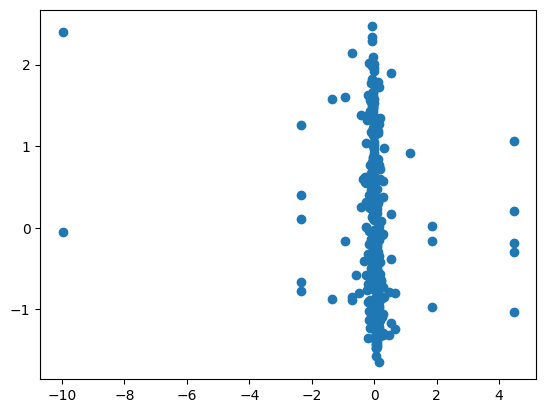

Min:  -9.973162524760719 Max:  4.469173439679058 Mean:  -1.6868535853631916e-09 Std:  0.9999999999999994


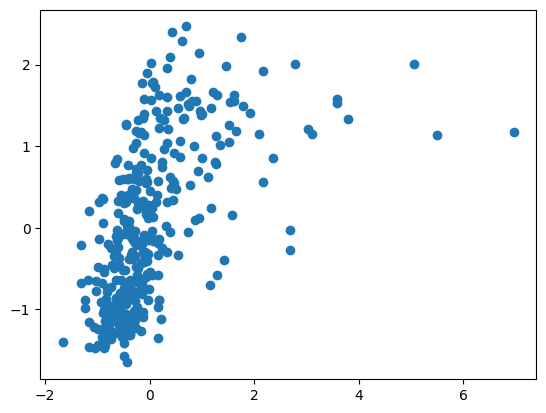

Min:  -1.6608296669488525 Max:  6.96641102656421 Mean:  -2.5160861747878902e-17 Std:  1.0


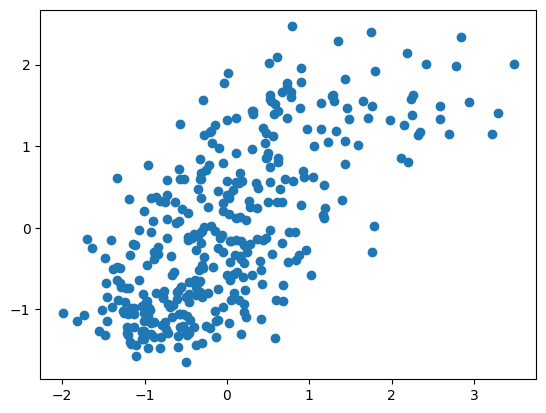

Min:  -1.992114739642959 Max:  3.4803845004618457 Mean:  -9.712092634681256e-16 Std:  1.0000000000000004


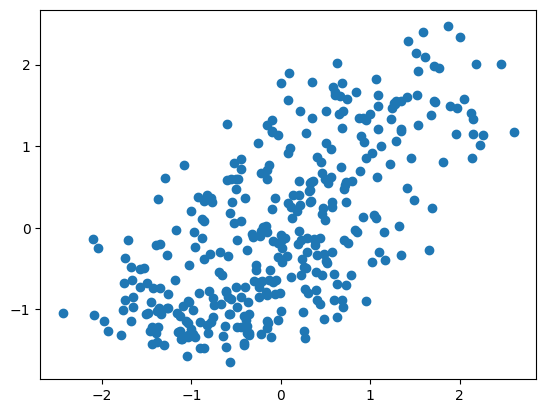

Min:  -2.438369771093199 Max:  2.6027002602406886 Mean:  1.6102951518642498e-16 Std:  1.0


In [8]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    

In [10]:
print(tester.trees[0])

-
	*
		*
			*
				-
					*
						/
							DataNode 9
							ScalarNode 0.831075865023876
						*
							ScalarNode 0.47685192186034375
							ScalarNode 0.7560901257804078
					+
						/
							ScalarNode 0.8055500147280785
							DataNode 1
						-
							ScalarNode 0.013650566176734769
							DataNode 0
				*
					ScalarNode 0.6340883431367222
					*
						*
							ScalarNode 0.5091532263113907
							DataNode 8
						+
							ScalarNode 0.8279826660022095
							ScalarNode 0.2863470539428221
			*
				+
					*
						+
							ScalarNode 0.2612037552546932
							DataNode 9
						+
							ScalarNode 0.17225410923895002
							DataNode 0
					-
						DataNode 4
						/
							ScalarNode 0.7735177706530917
							ScalarNode 0.677724971767468
				+
					DataNode 4
					ScalarNode 0.07823780736472219
		DataNode 7
	-
		ScalarNode 0.6340883431367222
		+
			+
				+
					-
						ScalarNode 0.004481588637020972
						-
							-
								DataNode 4
								ScalarNode 0.3032457671767105
							+
	